<a href="https://colab.research.google.com/github/obaileyw-uncc/ecgr5105/blob/main/hw03_classification_binary/hw03_classification_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECGR 5105 Homework 3: Binary Classification
**Owen Bailey-Waltz (801488178)**

In [525]:
# import required packages, load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from IPython.display import display

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Problem 1: Diabetes dataset

In [526]:
# load diabetes dataset
file_path = '/content/drive/MyDrive/datasets/diabetes.csv'
diabetes = pd.DataFrame(pd.read_csv(file_path))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [527]:
# check for nulls (should not be any as this is an example set)
diabetes.isnull().sum() * 100 / diabetes.shape[0]

,0
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0
BMI,0.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,0.0


In [528]:
# perform pre-processing - split training and validation sets, normalize data
diabetes_train, diabetes_val = train_test_split(diabetes,
                                                 train_size=0.8, test_size=0.2,
                                                 random_state=0)
scaler = StandardScaler()
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
diabetes_train[num_vars] = scaler.fit_transform(diabetes_train[num_vars])
diabetes_val[num_vars] = scaler.transform(diabetes_val[num_vars])
diabetes_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
603,0.908329,0.915694,0.449124,0.522226,0.373635,0.378526,0.677404,1.699558,1
118,0.036447,-0.751822,-0.472301,0.148149,-0.699657,-0.506672,-0.070497,-0.965692,0
247,-1.126063,1.387632,1.063407,0.771611,5.092711,2.540941,-0.118555,-0.882403,0
157,-0.835435,-0.374271,-0.677062,0.023456,0.450299,-0.886043,1.100914,-0.882403,0
468,1.198956,-0.028183,-3.543717,-1.285816,-0.699657,-0.279050,-0.851438,0.366933,1


In [529]:
y_train = diabetes_train.pop('Outcome')
X_train = diabetes_train
y_val = diabetes_val.pop('Outcome')
X_val = diabetes_val
X_val.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,-0.835435,2.457359,0.346743,1.395074,-0.699657,1.352245,2.785944,-0.965692
122,-0.544808,-0.437196,0.244363,0.584572,0.152162,0.176195,-0.187638,-0.882403
113,0.036447,-1.412536,-0.369921,-1.285816,-0.699657,0.226778,-0.226685,-0.715825
14,0.327074,1.419095,0.141982,-0.101237,0.791026,-0.810169,0.362024,1.449691
529,-1.126063,-0.311346,-0.216350,-1.285816,-0.699657,-0.961917,0.581288,-0.216090


In [530]:
# train model with SciKit Learn
# note: it is not possible to probe loss with SKLearn
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

MODEL: -0.788 + 0.310 * x_1 + 1.060 * x_2 - 0.261 * x_3 + 0.069 * x_4 - 0.158 * x_5 + 0.684 * x_6 + 0.294 * x_7 + 0.240 * x_8
Training Accuracy: 0.762214983713355
Validation Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706



Text(50.722222222222214, 0.5, 'Actual')

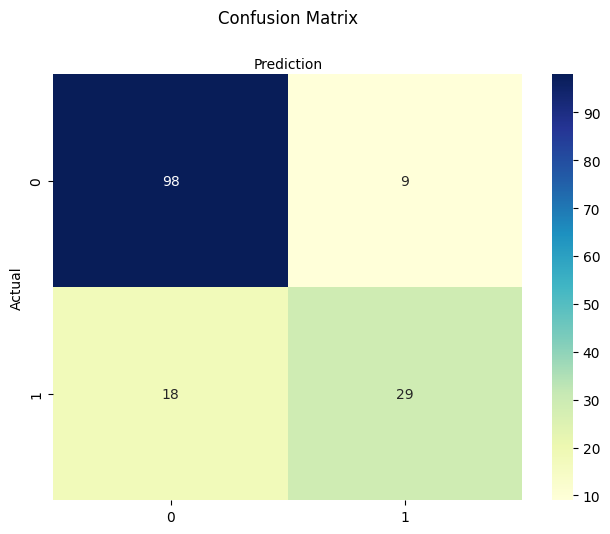

In [531]:
y_pred = model.predict(X_val)
confusion = metrics.confusion_matrix(y_val, y_pred)
training_metrics = {'Training Accuracy': model.score(X_train, y_train),
                    'Validation Accuracy': model.score(X_val, y_val),
                    'Precision': metrics.precision_score(y_val, y_pred),
                    'Recall': metrics.recall_score(y_val, y_pred),
                    'F1 Score': metrics.f1_score(y_val, y_pred)}

print('MODEL: {:.3f}'.format(model.intercept_[0]), end='')
coefficients = model.coef_[0]
for i in range(len(coefficients)):
  if coefficients[i] > 0:
    print(' + {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
  elif coefficients[i] < 0:
    print(' - {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
print()

for i in training_metrics:
  print("{}: {}".format(i, training_metrics[i]))
print()

# create heatmap for confusion matrix
# code frome example
classes = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Prediction')
plt.ylabel('Actual')

## Problem 2: Breast cancer dataset

### (a) No weight penalty

In [532]:
cancer = datasets.load_breast_cancer()
cancer_data = cancer.data
cancer_input = pd.DataFrame(cancer_data)
cancer_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [533]:
# check for nulls (should not be any as this is an example set)
cancer_input.isnull().sum() * 100 / diabetes.shape[0]

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [534]:
# label data features
labels = cancer.target
(i,) = labels.shape
labels = np.reshape(labels, (i, 1))
cancer_dataset = pd.DataFrame(np.concatenate([cancer_data,labels], axis=1))
cancer_dataset.columns = np.append(cancer.feature_names,'label')
display(cancer_dataset)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [535]:
# split training and validation sets, normalize data
cancer_train, cancer_val = train_test_split(cancer_dataset, train_size=0.8,
                                            test_size=0.2, random_state=0)
y_train = cancer_train.pop('label')
X_train = cancer_train
y_val = cancer_val.pop('label')
X_val = cancer_val
scaler = StandardScaler()
num_vars = X_train.columns
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_val[num_vars] = scaler.transform(X_val[num_vars])
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,-1.150365,-0.390642,-1.128550,-0.958764,0.310984,-0.595995,-0.802596,-0.802490,0.294539,0.094251,...,-1.043176,0.213533,-1.036045,-0.848808,0.342499,-0.730097,-0.812321,-0.757984,-0.016148,-0.385034
427,-0.937990,0.680514,-0.948201,-0.821525,-0.609636,-0.909867,-0.660669,-0.898716,0.754935,-0.425471,...,-0.715654,1.066842,-0.689922,-0.668697,-0.095537,-0.537866,-0.375048,-0.606870,0.096690,-0.386158
406,0.574121,-1.033336,0.513941,0.408586,-0.106161,-0.363019,-0.417990,-0.088446,-0.271820,-0.575221,...,0.297615,-0.977818,0.262137,0.113888,-0.524724,-0.520866,-0.182989,-0.023719,-0.200502,-0.751443
96,-0.547220,-0.316022,-0.577622,-0.566615,0.586662,-0.649331,-0.805298,-0.500065,0.331078,0.540567,...,-0.701325,-0.757927,-0.735737,-0.658966,-0.816748,-1.034921,-1.091633,-0.852545,-1.076186,-0.546883
490,-0.527398,0.791240,-0.561563,-0.523571,-1.051446,-1.017532,-0.905149,-0.935806,-0.969721,-0.426939,...,-0.427026,1.058637,-0.422423,-0.440955,-0.303494,-0.467251,-0.724565,-0.783118,0.311240,-0.082129


In [536]:
# train model with SciKit Learn
# note: it is not possible to probe loss with SKLearn
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

MODEL: 0.248 - 0.351 * x_1 - 0.489 * x_2 - 0.341 * x_3 - 0.408 * x_4 - 0.192 * x_5 + 0.448 * x_6 - 0.669 * x_7 - 0.845 * x_8 - 0.338 * x_9 + 0.213 * x_10 - 1.391 * x_11 + 0.039 * x_12 - 0.857 * x_13 - 0.971 * x_14 + 0.251 * x_15 + 0.667 * x_16 + 0.121 * x_17 - 0.222 * x_18 + 0.120 * x_19 + 0.865 * x_20 - 0.932 * x_21 - 1.041 * x_22 - 0.767 * x_23 - 0.890 * x_24 - 0.536 * x_25 - 0.020 * x_26 - 0.870 * x_27 - 0.975 * x_28 - 0.515 * x_29 - 0.611 * x_30
Training Accuracy: 0.989010989010989
Validation Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 Score: 0.9701492537313433



Text(50.722222222222214, 0.5, 'Actual')

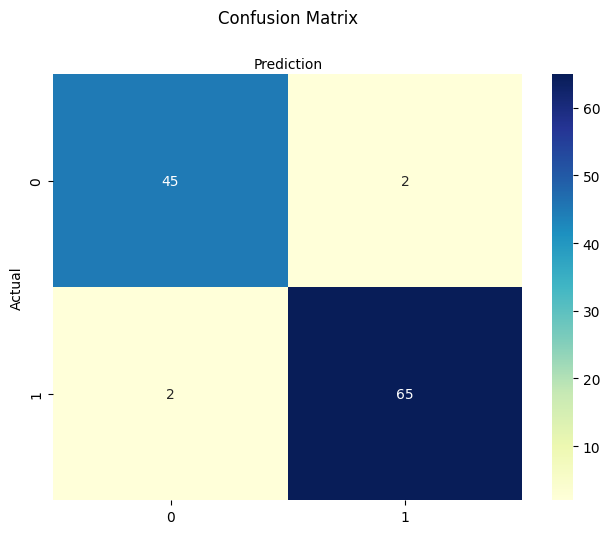

In [537]:
y_pred = model.predict(X_val)
confusion = metrics.confusion_matrix(y_val, y_pred)
training_metrics = {'Training Accuracy': model.score(X_train, y_train),
                    'Validation Accuracy': model.score(X_val, y_val),
                    'Precision': metrics.precision_score(y_val, y_pred),
                    'Recall': metrics.recall_score(y_val, y_pred),
                    'F1 Score': metrics.f1_score(y_val, y_pred)}

print('MODEL: {:.3f}'.format(model.intercept_[0]), end='')
coefficients = model.coef_[0]
for i in range(len(coefficients)):
  if coefficients[i] > 0:
    print(' + {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
  elif coefficients[i] < 0:
    print(' - {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
print()

for i in training_metrics:
  print("{}: {}".format(i, training_metrics[i]))
print()

# create heatmap for confusion matrix
# code frome example
classes = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Prediction')
plt.ylabel('Actual')

### (b) Weight penalty

In [538]:
# run logistic regression for a variety of parameter penalty lambdas
Lamb = [10, 1, 0.1, 0.01, 0.001]
for lamb in Lamb:
  model = LogisticRegression(penalty='l1', C=lamb,
                             solver='liblinear', random_state=0)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  print('C: ', lamb)
  confusion = metrics.confusion_matrix(y_val, y_pred)
  training_metrics = {'Training Accuracy': model.score(X_train, y_train),
                      'Validation Accuracy': model.score(X_val, y_val),
                      'Precision': metrics.precision_score(y_val, y_pred),
                      'Recall': metrics.recall_score(y_val, y_pred),
                      'F1 Score': metrics.f1_score(y_val, y_pred)}
  print('MODEL: {:.3f}'.format(model.intercept_[0]), end='')
  coefficients = model.coef_[0]
  for i in range(len(coefficients)):
    if coefficients[i] > 0:
      print(' + {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
    elif coefficients[i] < 0:
      print(' - {:.3f} * x_{}'.format(abs(coefficients[i]), i + 1), end='')
  print()
  print('CONFUSION MATRIX')
  display(pd.DataFrame(confusion))
  for i in training_metrics:
    print("{}: {}".format(i, training_metrics[i]))
  print()



C:  10
MODEL: -1.223 - 0.029 * x_2 - 0.870 * x_5 + 4.451 * x_6 - 3.293 * x_7 - 1.951 * x_8 - 0.621 * x_9 - 4.328 * x_11 + 0.451 * x_12 - 4.090 * x_14 + 0.400 * x_15 + 1.895 * x_17 - 2.786 * x_18 - 0.262 * x_19 + 6.410 * x_20 - 0.575 * x_21 - 2.913 * x_22 - 6.795 * x_24 + 0.250 * x_26 - 1.991 * x_27 - 0.216 * x_28 - 0.586 * x_29 - 5.503 * x_30
CONFUSION MATRIX


,0,1
0,44,3
1,3,64


Training Accuracy: 0.989010989010989
Validation Accuracy: 0.9473684210526315
Precision: 0.9552238805970149
Recall: 0.9552238805970149
F1 Score: 0.9552238805970149

C:  1
MODEL: 0.000 - 0.075 * x_2 - 0.833 * x_8 - 0.186 * x_9 - 2.936 * x_11 + 0.646 * x_16 + 0.623 * x_20 - 1.383 * x_21 - 1.399 * x_22 - 0.106 * x_23 - 2.637 * x_24 - 0.279 * x_25 - 0.917 * x_27 - 1.683 * x_28 - 0.497 * x_29 - 0.175 * x_30
CONFUSION MATRIX


,0,1
0,44,3
1,2,65


Training Accuracy: 0.989010989010989
Validation Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1 Score: 0.9629629629629629

C:  0.1
MODEL: 0.343 - 0.472 * x_8 - 0.555 * x_11 - 1.998 * x_21 - 0.583 * x_22 - 0.130 * x_25 - 1.021 * x_28 - 0.179 * x_29
CONFUSION MATRIX


,0,1
0,45,2
1,1,66


Training Accuracy: 0.9758241758241758
Validation Accuracy: 0.9736842105263158
Precision: 0.9705882352941176
Recall: 0.9850746268656716
F1 Score: 0.9777777777777777

C:  0.01
MODEL: 0.000 - 0.123 * x_21 - 0.193 * x_23 - 0.468 * x_28
CONFUSION MATRIX


,0,1
0,45,2
1,7,60


Training Accuracy: 0.9274725274725275
Validation Accuracy: 0.9210526315789473
Precision: 0.967741935483871
Recall: 0.8955223880597015
F1 Score: 0.9302325581395349

C:  0.001
MODEL: 0.000
CONFUSION MATRIX


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0,1
0,47,0
1,67,0


Training Accuracy: 0.3626373626373626
Validation Accuracy: 0.41228070175438597
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

